In [1]:
%matplotlib inline


# Averaging multiple FITS file Images and producing a Spectroscopic Graph


This notebook will open all the FITS file in a single folder and averages it. It will also produce a graph of intensity vs pixel number

This example uses `astropy.utils.data` to download the file, `astropy.io.fits` to open
the file, and `matplotlib.pyplot` to display the image.

-------------------

*By: Emir Muhammad and Edward Penny*

*License: BSD*

-------------------





Set up matplotlib, numpy, astropy and os modules


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths

Example of the initial code, producing a graph

In [3]:
'''
tracks = []
n = 0
for i in os.listdir('/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/PythonTest/'):
    if i.endswith(".fit"):
        n += 1
        filename1 = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/PythonTest/'
        filename2 = i
        filename ='/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/PythonTest/'+ str(i)

        image_file = get_pkg_data_filename(filename)
        image_data = fits.getdata(image_file, ext=0)
        tracks.append(image_data)

#print(tracks)        
mean = np.mean(tracks, axis = 0) #gets the mean of every single list, compiling it into a mean picture
snipmean = mean[210:410]
print(mean)
x = np.linspace(1,800, 800)
y = np.mean(snipmean, axis = 0)
#print(y)
plt.title('Plot of superMean Intensity Vs Pixel Number')
plt.xlabel(r'Pixel Number of CCDSPEC (px)')
plt.ylabel(r'Intensity(arbitrary units)')
# np.amin and np.amax return the maximum and minimum values of an array respectively
#plt.axis([np.amin(x), np.amax(x), 0, 4/3*np.amax(potential_array)])
plt.plot(x, y)
plt.show()
print(n)
'''

'\ntracks = []\nn = 0\nfor i in os.listdir(\'/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/PythonTest/\'):\n    if i.endswith(".fit"):\n        n += 1\n        filename1 = \'/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/PythonTest/\'\n        filename2 = i\n        filename =\'/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/PythonTest/\'+ str(i)\n\n        image_file = get_pkg_data_filename(filename)\n        image_data = fits.getdata(image_file, ext=0)\n        tracks.append(image_data)\n\n#print(tracks)        \nmean = np.mean(tracks, axis = 0) #gets the mean of every single list, compiling it into a mean picture\nsnipmean = mean[210:410]\nprint(mean)\nx = np.linspace(1,800, 800)\ny = np.mean(snipmean, axis = 0)\n#print(y)\nplt.title(\'Plot of superMean Intensity Vs Pixel Number\')\nplt.xlabel(r\'Pixel Number of CCDSPEC (px)\')\nplt.ylabel(r\'Intensity(arbitrary units)\')\n# np.amin and np.amax return the maximum and minimum values of an array respectively\n#plt.axis([np.amin(x), np.amax(x), 0, 4/3*n

Defining a function to calculate the mean data from a particular location

In [4]:
def mean_data(location):
    "This prints a passed string into this function"
    tracks = []
    for i in os.listdir(location):
        if i.endswith(".fit"):
            filename =location + '/' + str(i)
            image_file = get_pkg_data_filename(filename)
            image_data = fits.getdata(image_file, ext=0)
            tracks.append(image_data)
    mean = np.mean(tracks, axis = 0)
    return mean
#mean_data('/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/PythonTest').shape[1]

In [5]:
def plot_datapx(data, a=0, b=800):
    data = data
    snipmean = data[a:b]
    numberofx = snipmean.shape[1]
    x = np.linspace(1, numberofx, numberofx)
    y = np.mean(snipmean, axis = 0)
    plt.title('Plot of superMean Intensity Vs Pixel Number')
    plt.xlabel(r'Wavelength (m)')
    plt.ylabel(r'Intensity(arbitrary units)')
    peaks = find_peaks(y, height)
    for n in np.nditer(peaks[0]):
        plt.axvline(x=n,linestyle=':', color = 'r', label='f0')
    plt.axhline(y=height, linestyle=':', color = '#808080', label='1')
    plt.plot(x, y)
    plt.show()
    plt.figure()
    plt.imshow(data, cmap='gray')
    plt.colorbar()
    print(peaks)

In [6]:
def plot_datawv(data, a=240, b=360, MINspacebetweenpeaks = 10, PROMCUTOFF = 300):
    data = data
    snipmean = data[a:b]
    numberofx = snipmean.shape[1]
    xt = np.linspace(1, numberofx, numberofx)
    A = 6.640*10**(-10)
    B = 2.736*10**(-7)
    x = A*xt + B
    y = np.mean(snipmean, axis = 0)
    plt.title('Plot of superMean Intensity Vs Pixel Number')
    plt.xlabel(r'Wavelength (m)')
    plt.ylabel(r'Intensity(arbitrary units)')
    peaks,_ = find_peaks(y, distance = MINspacebetweenpeaks)
    proms = peak_prominences(y, peaks)[0]
    proms[proms < PROMCUTOFF] = 0 # making an array of 1's and 0's 
    promsford = list(proms)
    L0 = promsford.count(0)
    DC = 0
    while DC<L0:
        DC +=1
        promsford.remove(0) # finding prominences for the dictionary
    proms[proms > PROMCUTOFF] = 1 # making an array of 1's and 0's 
    keypeaks = proms*peaks # setting all peaks with low prominences to 0
    Lkeypeaks = list(keypeaks) # have to make it into a list to use count and remove
    L1= Lkeypeaks.count(0) # finding the number of 0's for the loop
    RC= 0 
    while RC<L1:
        RC +=1
        Lkeypeaks.remove(0) # remove only removes the first 0 so have to loop it through
    keypeaks = np.array(Lkeypeaks) # convert back to an array for the graphing
    Wavelengthsford= A*keypeaks + B
    Wavelengthsford = list(Wavelengthsford) #getting wavelengths of peaks for the dictionary
    #for n in np.nditer(keypeaks):
    #    plt.axvline(x= A*n+ B,linestyle=':', color = 'r', label='f0')
    plt.plot(x, y)
    #plt.figure()
    #plt.imshow(snipmean, cmap='gray')
    #plt.colorbar()
    Peaksdict = {}
    for i in range(len(promsford)): #assembling the peak dictionary
        Peaksdict[Wavelengthsford[i]] = promsford[i]
    #print(Peaksdict)
    #print(len(Peaksdict))
    #work out what the intensities should be
    #fuzzy comparision
    #get all the data from online
    '''finding rel intensities'''
    keypeaks =keypeaks.astype(int)
    peaksy = []
    for n in keypeaks:
        peaksy.append(y[n])
    TT=np.max(peaksy)
    relint=(peaksy/TT)*1000
    Relintdict = {}
    for i in range(len(peaksy)):
        Relintdict[Wavelengthsford[i]] = relint[i]
    print(Relintdict)
    widths = peak_widths(y, keypeaks)
    Wavelengthsford=np.array(Wavelengthsford)
    widths=widths[0]
    GD=[]
    for a,b,c in zip(Wavelengthsford,relint,widths):
        temp=[]
        temp.append(a)
        temp.append(b)
        temp.append(c)
        GD.append(temp)
    print(GD)

{4.5420800000000004e-07: 497.0066851809495, 4.70808e-07: 1000.0, 4.84088e-07: 656.2402211385138, 4.95376e-07: 608.9899182450597, 5.392000000000001e-07: 473.45997035496555}
[[4.5420800000000004e-07, 497.0066851809495, 2.1949049283470004], [4.70808e-07, 1000.0, 2.1306291074581054], [4.84088e-07, 656.2402211385138, 1.9999951875426518], [4.95376e-07, 608.9899182450597, 2.396749316803664], [5.392000000000001e-07, 473.45997035496555, 11.30848327900486]]


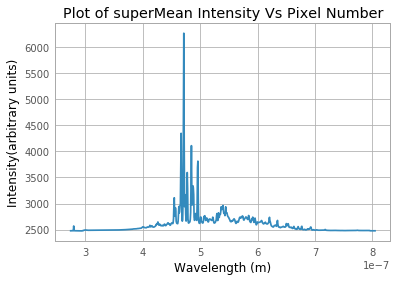

In [7]:
Xenonlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Xenon data/'  
plot_datawv(mean_data(Xenonlocation))

{4.14368e-07: 475.82939547364964, 4.31632e-07: 614.7478485239689, 4.4159200000000003e-07: 652.9076506602228, 4.54872e-07: 709.2487403037569, 4.64832e-07: 641.0589707592618, 4.7213600000000004e-07: 718.9522329905424, 4.92056e-07: 797.1845326471198, 5.086559999999999e-07: 782.7338627779403, 5.166240000000001e-07: 713.067586825514, 5.28576e-07: 682.7940298852596, 5.3588e-07: 634.6039438720161, 5.5912e-07: 1000.0, 5.69744e-07: 626.6592837996383, 5.89e-07: 933.3993146506277, 6.02944e-07: 490.6267716199168, 7.6828e-07: 431.2852443110622}
[[4.14368e-07, 475.82939547364964, 7.599287414480472], [4.31632e-07, 614.7478485239689, 2.985470715690809], [4.4159200000000003e-07, 652.9076506602228, 6.662066203894739], [4.54872e-07, 709.2487403037569, 7.181472112719803], [4.64832e-07, 641.0589707592618, 3.2949408731595895], [4.7213600000000004e-07, 718.9522329905424, 10.24219143570184], [4.92056e-07, 797.1845326471198, 14.835849238739797], [5.086559999999999e-07, 782.7338627779403, 7.912480303327754], [5

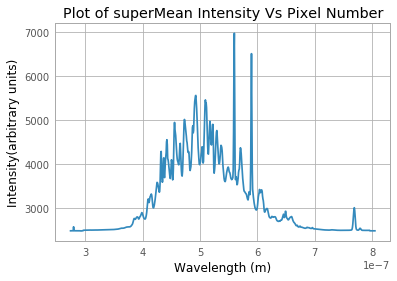

In [8]:
Kryptonlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Krypton data/'  
plot_datawv(mean_data(Kryptonlocation))

{3.898e-07: 322.32237623131806, 4.14368e-07: 370.2599042938244, 4.21672e-07: 408.39287383382424, 4.28312e-07: 369.5635998630912, 4.396e-07: 438.7099067439883, 4.52216e-07: 717.0485022988506, 4.67488e-07: 399.181305649646, 4.74128e-07: 366.09737408547755, 4.84088e-07: 1000.0, 4.973680000000001e-07: 353.44576284438773, 5.06664e-07: 339.99663966457956, 5.19944e-07: 898.4664907127698, 5.60448e-07: 522.1169902957756, 6.07592e-07: 285.4183886618588, 6.57392e-07: 279.1819299674832}
[[3.898e-07, 322.32237623131806, 10.42874826453442], [4.14368e-07, 370.2599042938244, 3.6063395903977664], [4.21672e-07, 408.39287383382424, 4.002835571415062], [4.28312e-07, 369.5635998630912, 4.366677951862641], [4.396e-07, 438.7099067439883, 4.003495905166318], [4.52216e-07, 717.0485022988506, 3.443416917612865], [4.67488e-07, 399.181305649646, 2.4079874778042267], [4.74128e-07, 366.09737408547755, 2.615259464218468], [4.84088e-07, 1000.0, 3.764705680789291], [4.973680000000001e-07, 353.44576284438773, 2.4672851

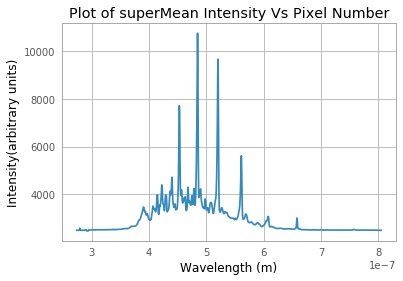

In [9]:
Argonlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Argon Data/'
plot_datawv(mean_data(Argonlocation))

{4.19016e-07: 80.20222185759047, 4.36944e-07: 83.17026566805178, 4.4956e-07: 150.7765206483763, 4.81432e-07: 266.9282971042221, 4.98032e-07: 98.37019764869467, 5.05336e-07: 106.3208135269027, 5.166240000000001e-07: 290.2067428167642, 5.23264e-07: 101.40709538847987, 5.37872e-07: 121.52497809158682, 5.571280000000001e-07: 215.9554894364238, 5.64432e-07: 112.73996311579923, 5.73728e-07: 103.84312259077977, 5.8236e-07: 1000.0, 5.91656e-07: 236.55876673350826, 6.049360000000001e-07: 256.36120355412123, 6.11576e-07: 343.87550457844475, 6.24192e-07: 193.36944136700336, 6.31496e-07: 173.512021341927, 6.38136e-07: 332.32111042305917, 6.49424e-07: 185.0254336344543, 6.587200000000001e-07: 130.85813096127438, 6.66688e-07: 135.89736405712475, 6.93248e-07: 80.200508801802, 7.03872e-07: 77.75132153284922}
[[4.19016e-07, 80.20222185759047, 5.314730280027419], [4.36944e-07, 83.17026566805178, 4.537226097191422], [4.4956e-07, 150.7765206483763, 2.9727128501426137], [4.81432e-07, 266.9282971042221, 3.0

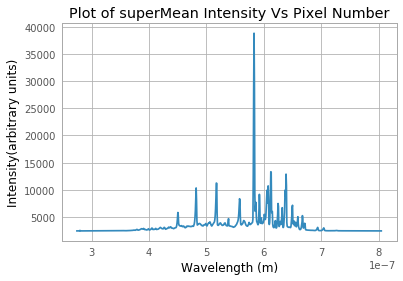

In [10]:
Neonlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Neon Data/'
plot_datawv(mean_data(Neonlocation))

{3.7984e-07: 385.1135472816842, 3.90464e-07: 426.63327119442334, 3.99096e-07: 359.81092040418855, 4.0573600000000003e-07: 392.96930858228484, 4.1968e-07: 347.70029492793446, 4.27648e-07: 417.3021498978115, 4.34288e-07: 336.605953239911, 4.50224e-07: 566.0156422818794, 4.70808e-07: 344.3991211192626, 4.82096e-07: 728.3176636871317, 4.913920000000001e-07: 358.6712939211496, 5.00688e-07: 799.7689537001226, 5.17952e-07: 684.8951649263125, 5.58456e-07: 493.6517352852901, 5.8568e-07: 962.9544922155476, 6.049360000000001e-07: 353.8862118792032, 6.554e-07: 388.9209740033699, 6.67352e-07: 1000.0, 7.07856e-07: 381.843936195216, 7.304320000000001e-07: 276.75242435630474}
[[3.7984e-07, 385.1135472816842, 2.9855628638571545], [3.90464e-07, 426.63327119442334, 5.68958545106122], [3.99096e-07, 359.81092040418855, 2.4542836360132014], [4.0573600000000003e-07, 392.96930858228484, 2.9481755900225437], [4.1968e-07, 347.70029492793446, 3.114348123005982], [4.27648e-07, 417.3021498978115, 4.1356183491568],

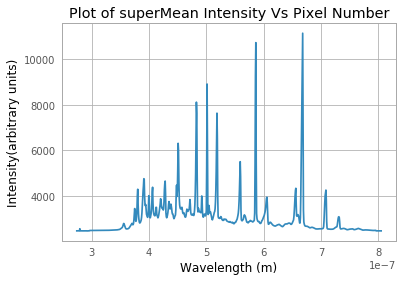

In [11]:
Heliumlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Helium Data/'
plot_datawv(mean_data(Heliumlocation))

{3.60584e-07: 71.00405896937053, 4.4225600000000004e-07: 62.98027184549482, 4.68152e-07: 991.7800984180598, 4.80104e-07: 1000.0, 5.07992e-07: 997.1989219874819, 5.152960000000001e-07: 76.66575384468591, 6.43448e-07: 443.31350601567186}
[[3.60584e-07, 71.00405896937053, 5.72948037258648], [4.4225600000000004e-07, 62.98027184549482, 2.2320684042693983], [4.68152e-07, 991.7800984180598, 3.138584801151012], [4.80104e-07, 1000.0, 3.653160421900452], [5.07992e-07, 997.1989219874819, 3.147663773664192], [5.152960000000001e-07, 76.66575384468591, 1.7559861025382588], [6.43448e-07, 443.31350601567186, 2.1315057254872727]]


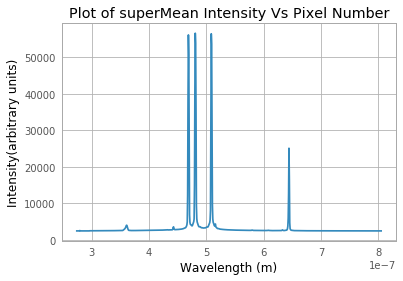

In [12]:
Cadmiumlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Cadmium Calibration Data/'
plot_datawv(mean_data(Cadmiumlocation))

In [13]:
f=open('/Users/Edward/Documents/year 2/lab project/Atomic Data/helium.txt',"r")
lines=f.readlines()

result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
Heliumdict = {}
results = [float(i)*10**(-10) for i in result]
for i in range(len(result)): #assembling the peak dictionary
    Heliumdict[results[i]] = a[i]
#print(len(Heliumdict))
#print(results)


In [14]:
f=open('/Users/Edward/Documents/year 2/lab project/Atomic Data/argon.txt',"r")
lines=f.readlines()

result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
Argondict = {}
results = [float(i)*10**(-10) for i in result]
for i in range(len(result)): #assembling the peak dictionary
    Argondict[results[i]] = a[i]
#print(len(Argondict))

In [15]:
f=open('/Users/Edward/Documents/year 2/lab project/Atomic Data/neon.txt',"r")
lines=f.readlines()
result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
results = [float(i)*10**(-10) for i in result]
Neondict = {}
for i in range(len(result)): #assembling the peak dictionary
    Neondict[results[i]] = a[i]
#print(Neondict)

In [16]:
f=open('/Users/Edward/Documents/year 2/lab project/Atomic Data/krypton.txt',"r")
lines=f.readlines()

result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
results = [float(i)*10**(-10) for i in result]
Kryptondict = {}
for i in range(len(result)): #assembling the peak dictionary
    Kryptondict[results[i]] = a[i]
#print(len(Kryptondict))

In [17]:
f=open('/Users/Edward/Documents/year 2/lab project/Atomic Data/xenon.txt',"r")
lines=f.readlines()

result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
results = [float(i)*10**(-10) for i in result]
Xenondict = {}
for i in range(len(result)): #assembling the peak dictionary
    Xenondict[results[i]] = a[i]
#print(Xenondict)

In [18]:
True_element_rel_in_d = {'He': Heliumdict, 'Ne' : Neondict, 'Ar' : Argondict, 'Kr':  Kryptondict, 'Xe' : Xenondict}

#print(True_element_rel_in_d)
#print(True_element_rel_in_d.values)
a=True_element_rel_in_d.get('He').keys()
#print(True_element_rel_in_d.items())

'''
for n,k in True_element_rel_in_d:
    print('\nelement:'+ n)
    for wv in k:
        print(wv)
'''


datad= {}
for keys in True_element_rel_in_d.keys():
    datad.update({f'{keys}': list(True_element_rel_in_d.get(f'{keys}').keys())})
#(print(datad))

In [19]:
def peaks_datawv(data, a=210, b=410, MINspacebetweenpeaks = 10, PROMCUTOFF = 250):
    data = data
    snipmean = data[a:b]
    numberofx = snipmean.shape[1]
    xt = np.linspace(1, numberofx, numberofx)
    A = 6.640*10**(-10)
    B = 2.736*10**(-7)
    x = A*xt + B
    y = np.mean(snipmean, axis = 0)
    peaks,_ = find_peaks(y, distance = MINspacebetweenpeaks)
    proms = peak_prominences(y, peaks)[0]
    proms[proms < PROMCUTOFF] = 0 # making an array of 1's and 0's 
    promsford = list(proms)
    L0 = promsford.count(0)
    DC = 0
    while DC<L0:
        DC +=1
        promsford.remove(0) # finding prominences for the dictionary
    proms[proms > PROMCUTOFF] = 1 # making an array of 1's and 0's 
    keypeaks = proms*peaks # setting all peaks with low prominences to 0
    Lkeypeaks = list(keypeaks) # have to make it into a list to use count and remove
    L1= Lkeypeaks.count(0) # finding the number of 0's for the loop
    RC= 0 
    while RC<L1:
        RC +=1
        Lkeypeaks.remove(0) # remove only removes the first 0 so have to loop it through
    keypeaks = np.array(Lkeypeaks) # convert back to an array for the graphing
    Wavelengthsford= A*keypeaks + B
    Wavelengthsford = list(Wavelengthsford) #getting wavelengths of peaks for the dictionary
    #plt.axhline(y=height, linestyle=':', color = '#808080', label='1')
    Peaksdict = {}
    for i in range(len(promsford)): #assembling the peak dictionary
        Peaksdict[Wavelengthsford[i]] = promsford[i]
    return Peaksdict

In [20]:
testunknown= peaks_datawv(mean_data(Heliumlocation))
#print(testunknown)
unknown = list(testunknown.keys())
print(unknown)
#True_element_rel_in_d
founddict = {}
for element in datad.keys():
    thelist = []
    for x in unknown:
        for y in datad.get(element):
            if abs(x - y) < 6.640*10**(-10):
                thelist.append(y)
    founddict.update({f'{element}' : thelist})
print('')
print(founddict)

[3.7984e-07, 3.90464e-07, 3.99096e-07, 4.0573600000000003e-07, 4.1237600000000004e-07, 4.1968e-07, 4.27648e-07, 4.34288e-07, 4.50224e-07, 4.70808e-07, 4.82096e-07, 4.913920000000001e-07, 5.00688e-07, 5.17952e-07, 5.58456e-07, 5.8568e-07, 6.049360000000001e-07, 6.554e-07, 6.67352e-07, 7.07856e-07, 7.304320000000001e-07]

{'He': [4.1208199999999997e-07, 4.12099e-07, 4.71315e-07, 4.7133800000000003e-07, 6.5601e-07, 6.67815e-07], 'Ne': [4.7043999999999997e-07, 4.70886e-07, 4.71007e-07, 4.7120699999999997e-07, 4.82734e-07, 5.00516e-07, 5.85249e-07, 6.67828e-07], 'Ar': [3.99479e-07, 4.05292e-07, 4.1907100000000003e-07, 4.1910299999999996e-07, 4.1983199999999997e-07, 4.20067e-07, 4.27217e-07, 4.27753e-07, 4.2829e-07, 4.34517e-07, 4.3480600000000006e-07, 4.70232e-07, 5.00933e-07, 5.860310000000001e-07, 6.043220000000001e-07, 6.05272e-07, 6.67728e-07], 'Kr': [3.90618e-07, 3.9948400000000003e-07, 4.05704e-07, 4.2739700000000005e-07, 4.2829700000000007e-07, 4.5023500000000006e-07, 4.82518e-07, 5.

# Anything below this is scrap

In [ ]:
testdata = mean_data('/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Helium Data')
testspectrum = np.mean(testdata, axis = 0)

data = testdata
snipmean = data
numberofx = snipmean.shape[1]
x = np.linspace(1, numberofx, numberofx)
y = np.mean(snipmean, axis = 0)
plt.title('Plot of superMean Intensity Vs Pixel Number')
plt.xlabel(r'Pixel Number of CCDSPEC (px)')
plt.ylabel(r'Intensity(arbitrary units)')
peaks = find_peaks(testspectrum, height=3200)
a = np.arange(6)
print(a)
print(peaks[0])
for n in np.nditer(peaks[0]):
    plt.axvline(x=n,linestyle='--', color = '#808080', label='f0')
plt.plot(x, y)
plt.show()
plt.figure()
plt.imshow(data, cmap='gray')
plt.colorbar()

In [ ]:
optimisation
curve fitting
calculate chi squared for each point
minise chi